In [326]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [327]:
# Number of examples.
N = 1000

centers = [[0.0, 0.0], [0, 1.0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=42)

x1 = X[:,0]
x2 = X[:,1]

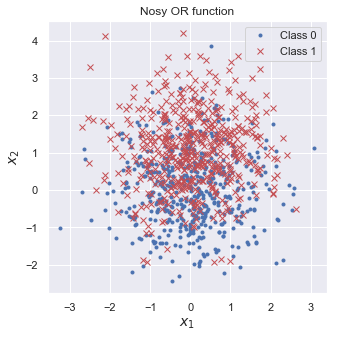

In [328]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy OR function')
plt.legend()
plt.show()

# Using SGDClassifier as a perceptron

In [329]:
sgd = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=1, penalty=None, random_state=42)
sgd.fit(X, y)

print('weights: ',sgd.coef_[0])
print('bias: ',sgd.intercept_)

weights:  [-1.16346168  0.8622707 ]
bias:  [-2.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [330]:
y_pred = sgd.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.445


In [331]:
# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.555


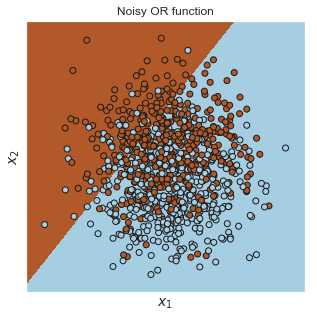

In [332]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Z = clf.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])
Z = sgd.predict(np.c_[ xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy OR function')
plt.show()

# Perceptron

In [348]:
per = Perceptron(random_state=42)
per

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [349]:
per.fit(X, y)

print('weights: ',per.coef_[0])
print('bias: ',per.intercept_)
print('n_iter: ',per.n_iter_)

weights:  [-1.16346168  0.8622707 ]
bias:  [-2.]
n_iter:  5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [335]:
y_pred = per.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.445


In [336]:
# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.555


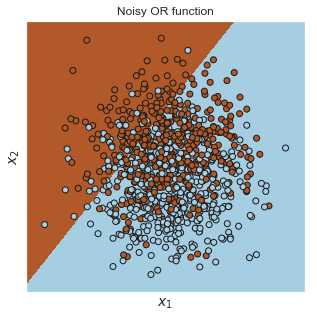

In [337]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy OR function')
plt.show()

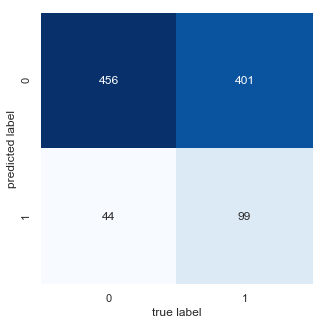

In [338]:
# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Logistic Regression

In [339]:
# Instantiate LogisticRegression object.
lr = LogisticRegression(solver='lbfgs', random_state=42)
# Train model.
lr.fit(X, y)

print('weights: ',lr.coef_[0])
print('bias: ',lr.intercept_)
print('n_iter: ',lr.n_iter_)

weights:  [0.05678223 1.00176075]
bias:  [-0.55434255]
n_iter:  [7]


In [340]:
y_pred = lr.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.299


In [341]:
# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.701


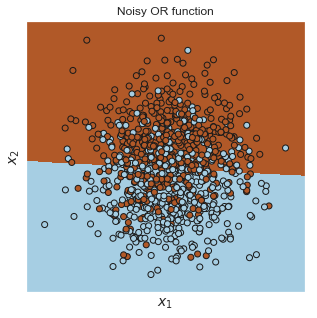

In [342]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Z = lr.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy OR function')
plt.show()

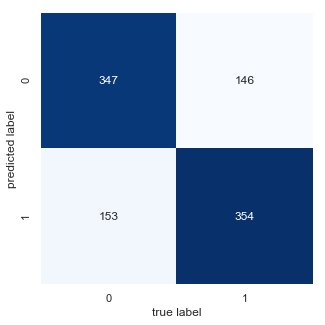

In [343]:
# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

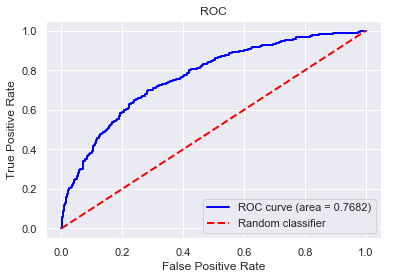

In [344]:
# Getting the probabilities for each class.
y_prob = lr.predict_proba(X)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# The reason why LR is better than the Perceptron

In general, the perceptron rule may not converge to a stable solution for fixed learning rate.
If no separating hyperplane exists, the alorithm does not have to converge and will iterate forever.

Além disso, o LR uso gradiente descendente para encontrar o mínimo global. Sabemos que a sufercície de erro é convexa e consequentemente, dado que esperemos o suficiente e o passo de aprendizagem não seja muito grande, o GD sempre converge para o ponto ótimo.

Já no caso do perceptron, como vimos, sua aprendizagem é parecida com a do gradiente descendente estocástico, o qual não garante que o mínimo global seja encontrado. Lembre-se que com o gradiente descendente estocástico, a solução fica variando em torno do mínimo global. Uma soluçãopara esse problema é usar uma estratégia de diminuição do passo deaprendizagem, da mesma forma como fizemos para o gradiente descendente estocástico.

# Observations

The fit_intercept in sklearn’s linear regression is a boolean parameter.

It is the place where we specify if we want to include an intercept to the model. By default it is set to True, so sklearn automatically includes the intercept.

Other names for ‘intercept’, depending on the context are: constant and bias.

Mathematically, it adds a column of 1s to the inputs.

In general, including the intercept is a good idea as it relaxes one of the assumptions of OLS (zero mean of error term).